<a href="https://colab.research.google.com/github/ClaireChiang91/ad-hoc/blob/main/Kaggle_KMeans_Clustering_in_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Goal**:<br>
This is to practice clustering method(major for KMeans) and use Kaggle Mall Customer Segmentation Data.<br>
**Reference**: 
Kaggle dataset: [link](https://www.kaggle.com/shwetabh123/mall-customers)


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
# Mount Google Drive to Colab
from google.colab import drive
drive.mount('/content/gdrive')
#data=pd.read_csv('./gdrive/My Drive/Mall_Customers.csv',usecols=[0,1],encoding="latin")
MallCustomers=pd.read_csv('./gdrive/My Drive/Mall_Customers.csv')

Mounted at /content/gdrive


In [3]:
#view data (for only the first ten rows)
MallCustomers.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [4]:
#learn how many rows and columns
MallCustomers.shape

(200, 5)

In [5]:
MallCustomers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
#check missing data
MallCustomers.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
#create feature datasets, inlcuding only annual income and spending score
X=MallCustomers.iloc[:,[3,4]].values

In [8]:
#K-means algorithm
from sklearn.cluster import KMeans
#an array for saving the KMeans values when iterating different amount of clusters
ss_dis_lt=[]
#the max amount of clusters
k=11 

for i in range(1,k):
  k_means=KMeans(n_clusters=i, init='k-means++',random_state=0)
  k_means.fit(X)
  #inertia_: Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.
  ss_dis_lt.append(k_means.inertia_)

In [9]:
ss_dis_lt

[269981.28,
 181363.59595959596,
 106348.37306211118,
 73679.78903948834,
 44448.45544793371,
 37239.83554245604,
 30273.394312070042,
 25018.576334776335,
 21850.165282585633,
 19664.685196005543]

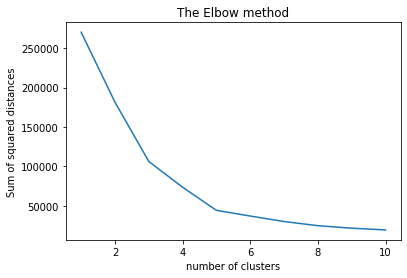

In [10]:
#visulization 
plt.plot(range(1,k),ss_dis_lt)
plt.title("The Elbow method")
plt.xlabel("number of clusters")
plt.ylabel("Sum of squared distances")
plt.show()

In [11]:
#from the above figure, the last elbow is 5 clusters(k=5)
k_meanas_model=KMeans(n_clusters=5, init='k-means++',random_state=0)
y_kmeans=k_meanas_model.fit_predict(X)

In [12]:
y_kmeans

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0,
       3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 2, 0, 2, 4, 2, 4, 2,
       0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2], dtype=int32)

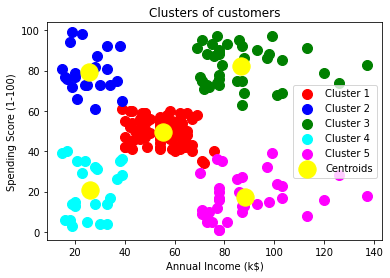

In [13]:
#visulization: the yellow dots are the centroids and the rest five colors stand for five clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(k_meanas_model.cluster_centers_[:, 0], k_meanas_model.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()